In [227]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/from-data-to-dollars-predicting-insurance-charge/validation_dataset.csv
/kaggle/input/from-data-to-dollars-predicting-insurance-charge/insurance.csv


In [228]:
import matplotlib.pyplot as plt 
import seaborn as sns


In [229]:
data = pd.read_csv("/kaggle/input/from-data-to-dollars-predicting-insurance-charge/insurance.csv")

In [230]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [232]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50.0,male,30.97,3.0,no,Northwest,$10600.5483
1334,-18.0,female,31.92,0.0,no,Northeast,2205.9808
1335,18.0,female,36.85,0.0,no,southeast,$1629.8335
1336,21.0,female,25.80,0.0,no,southwest,2007.945
1337,61.0,female,29.07,0.0,yes,northwest,29141.3603


In [233]:
for feature in data:
    print(f"feature name: {feature} & number of nulls:  {data[feature].isna().sum()}")


feature name: age & number of nulls:  66
feature name: sex & number of nulls:  66
feature name: bmi & number of nulls:  66
feature name: children & number of nulls:  66
feature name: smoker & number of nulls:  66
feature name: region & number of nulls:  66
feature name: charges & number of nulls:  54


In [234]:
data.shape

(1338, 7)

In [235]:
data['age'].fillna(data['age'].mean(), inplace=True)

<ipython-input-235-e2627324ccf1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(), inplace=True)


In [236]:
data['age']=data['age'].astype(int)

In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


In [238]:
data['charges'] = data['charges'].str.replace('$','')

In [239]:
print(data['charges'])

0         16884.924
1         1725.5523
2          4449.462
3       21984.47061
4         3866.8552
           ...     
1333     10600.5483
1334      2205.9808
1335      1629.8335
1336       2007.945
1337     29141.3603
Name: charges, Length: 1338, dtype: object


In [240]:
data['charges'] = data['charges'].astype(float)

In [241]:
data['children'].fillna(data['children'].mean(), inplace=True)

<ipython-input-241-cc6d1b70e29c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['children'].fillna(data['children'].mean(), inplace=True)


In [242]:
data['children']=data['children'].astype(int)

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1272 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [244]:
numerical_cols = data.select_dtypes(include=['number'])

In [245]:
numerical_cols.corr()

,age,bmi,children,charges
age,1.000000,0.077848,0.044790,0.170054
bmi,0.077848,1.000000,0.000923,0.195167
children,0.044790,0.000923,1.000000,0.046110
charges,0.170054,0.195167,0.046110,1.000000


<Axes: >

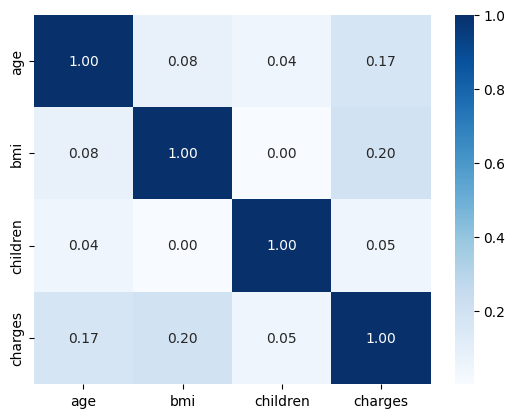

In [246]:
sns.heatmap(numerical_cols.corr(),annot=True, cmap="Blues", fmt=".2f")

In [247]:
print(data['sex'].value_counts())



sex
male      517
female    503
man        64
M          64
woman      62
F          62
Name: count, dtype: int64


In [248]:
data['sex'] = data['sex'].replace({
    'man':'male',
    'M':'male',
    'woman':'female',
    'F':'female'
})

In [249]:
print(data['sex'].value_counts())


sex
male      645
female    627
Name: count, dtype: int64


In [250]:
print(data['smoker'].value_counts())


smoker
no     1013
yes     259
Name: count, dtype: int64


In [251]:
data['sex'].fillna(data['sex'].mode()[0], inplace=True)

<ipython-input-251-3a0a999f5f4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['sex'].fillna(data['sex'].mode()[0], inplace=True)


In [252]:
data['sex'].shape

(1338,)

In [253]:
print(data['region'].value_counts())

region
Southeast    172
southeast    170
southwest    164
Northwest    161
Northeast    155
northeast    153
northwest    149
Southwest    148
Name: count, dtype: int64


In [254]:
data['region'].fillna(data['region'].mode()[0], inplace=True)

<ipython-input-254-fe50eb63d72c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['region'].fillna(data['region'].mode()[0], inplace=True)


In [255]:
data['region'].shape

(1338,)

In [256]:
cat_cols = data.select_dtypes('object')

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


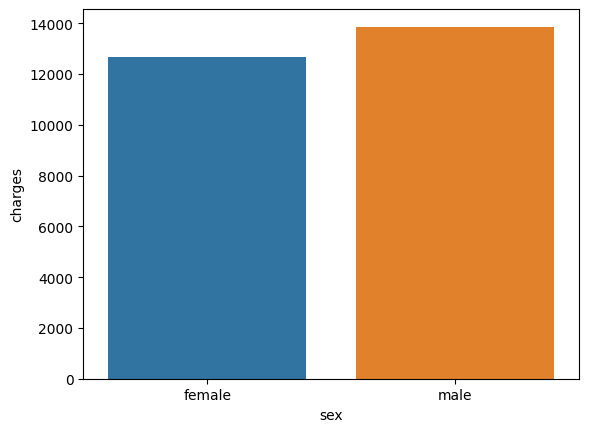

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


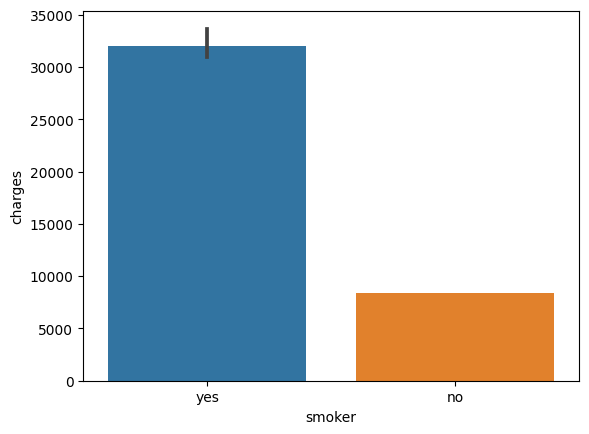

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


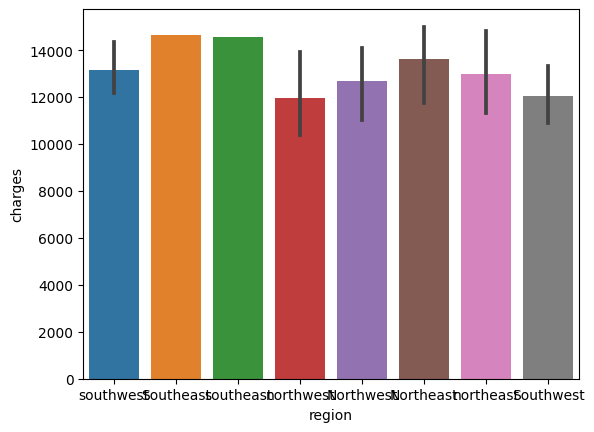

In [257]:
for c in cat_cols:
    sns.barplot(x=data[c], y=data['charges'], estimator=np.mean)
    plt.show()
    


In [258]:
data['region'].unique()

array(['southwest', 'Southeast', 'southeast', 'northwest', 'Northwest',
       'Northeast', 'northeast', 'Southwest'], dtype=object)

In [259]:
data['region']=data['region'].replace({
    'Southeast':'southeast',
    'Northwest' : 'northwest',
    'Northeast' : 'northeast',
    'Southwest' : 'southwest'
    
})

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


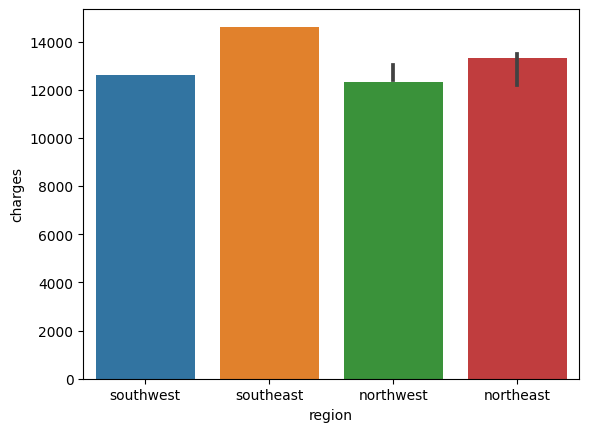

In [260]:
sns.barplot(x=data['region'],y=data['charges'],estimator=np.mean)
plt.show()

In [261]:
numerical_cols = data.select_dtypes(['int','float'])

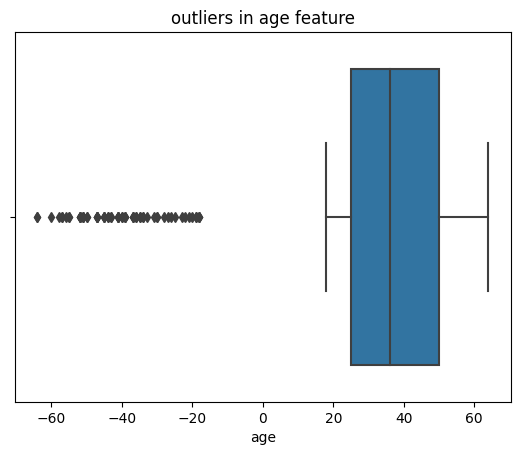

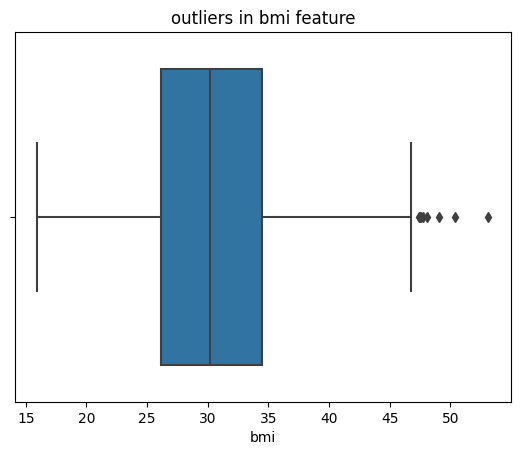

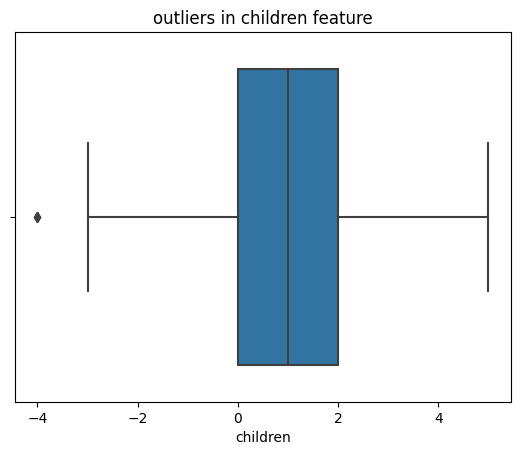

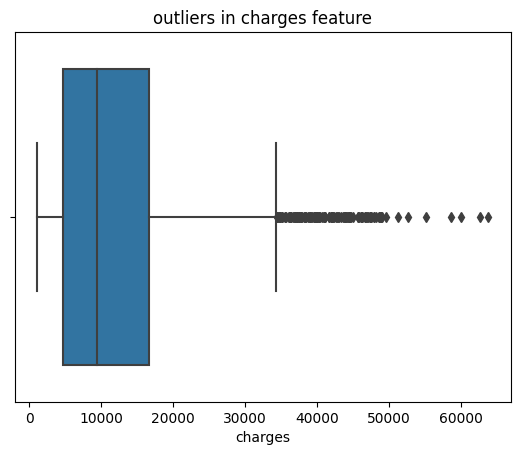

In [262]:
for c in numerical_cols:
    sns.boxplot(x=data[c])
    plt.title(f"outliers in {c} feature")
    plt.show()

In [263]:
data['age'].unique()

array([ 19,  18,  28,  33,  32, -31,  46,  37,  60,  25,  62,  23,  56,
       -27,  52, -23,  30, -34,  59,  63,  55,  31,  22,  35,  26,  24,
        41,  21,  48,  36,  40,  58,  34,  43,  64,  20,  61,  27,  53,
        44,  57, -41,  45, -35,  54,  38,  29,  49,  47,  51,  42,  50,
       -44, -39, -28, -40,  39, -25, -52, -26, -47, -45, -57, -43, -50,
       -58, -56, -30, -51, -60, -37, -55, -64, -22, -36, -21, -18, -20,
       -19, -33])

In [264]:
data['age'] = data['age'].abs()

In [265]:
data['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 35, 26, 24, 41, 21, 48, 36, 40, 58, 43, 64, 20, 61,
       53, 44, 57, 45, 54, 38, 29, 49, 47, 51, 42, 50, 39])

<Axes: xlabel='age'>

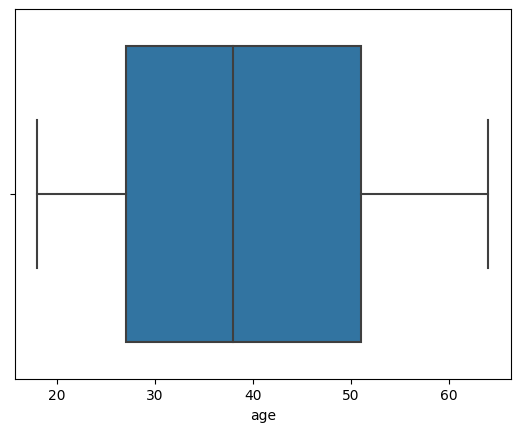

In [266]:
sns.boxplot(x=data['age'])

In [267]:
data['children'].unique()

array([ 0,  1,  3,  2, -1,  4, -2,  5, -3, -4])

In [268]:
data['children'] = data['children'].abs()

<Axes: xlabel='children'>

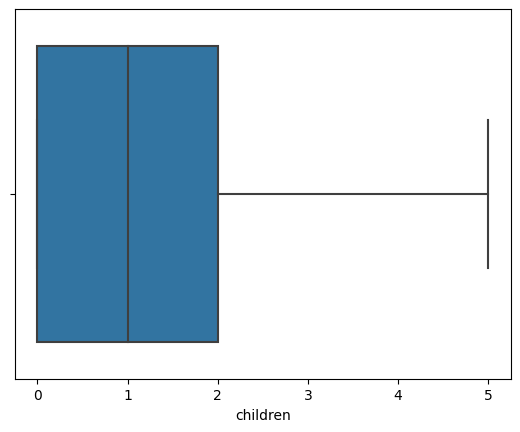

In [269]:
sns.boxplot(x=data['children'])

In [270]:
data['sex']=data['sex'].map({
    'male':0,
    'female':1
})

In [271]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [272]:
data['smoker']=data['smoker'].map({
    'no':0,
    'yes':1
})

In [273]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1.0,southwest,16884.92400
1,18,0,33.770,1,0.0,southeast,1725.55230
2,28,0,33.000,3,0.0,southeast,4449.46200
3,33,0,22.705,0,0.0,northwest,21984.47061
4,32,0,28.880,0,0.0,northwest,3866.85520


In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1272 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1272 non-null   float64
 5   region    1338 non-null   object 
 6   charges   1272 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 73.3+ KB


In [275]:
data['smoker'].fillna(data['smoker'].mean(),inplace=True)

<ipython-input-275-8bad8ea4bd76>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['smoker'].fillna(data['smoker'].mean(),inplace=True)


In [276]:
data['smoker']=data['smoker'].astype(int)

In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1272 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1272 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [278]:
data['charges'].fillna(data['charges'].mean(),inplace=True)
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

<ipython-input-278-3305dfa4092b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['charges'].fillna(data['charges'].mean(),inplace=True)
<ipython-input-278-3305dfa4092b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [280]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error

In [281]:
encoder = LabelEncoder()
data['region'] = encoder.fit_transform(data['region'])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


In [282]:
X = data.iloc[:,:-1]
y= data['charges']

In [283]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [284]:
model=LinearRegression()

In [285]:
model.fit(x_train,y_train)

LinearRegression()

In [286]:
y_pred=model.predict(x_test)

In [287]:
r2_score(y_test,y_pred)

0.5133655126242934

In [288]:
mean_absolute_error(y_test, y_pred)

5339.708478129324